In [ ]:
The following is present in test as only the monster part.
To do find code were it was extracted

In [1]:
from fragmenstein.demo import TestSet
from fragmenstein import Monster, Victor, Igor
from rdkit import Chem

In [2]:
Igor.init_pyrosetta()

PyRosetta-4 2022 [Rosetta PyRosetta4.conda.mac.cxx11thread.serialization.python38.Release 2022.12+release.a4d79705213bc2acd6b51e370eddbb2738df6866 2022-03-20T21:59:37] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [3]:
mols = TestSet.get_5SB7_mols()
victor = Victor(mols[:2], pdb_filename='5SB3_template.pdb', 
                ligand_resi='1X', covalent_resi='1A')
# the custom map applies to mols[3] not the smiles.
victor.place(mols[3],
             long_name='victor_todalam',
              merging_mode='expansion',
              custom_map={'F36': {1: 7},
                          'F04': {4: -1,  # no amine
                                  12: 13,  # root to Ph
                                  13: 5,
                                  6: 14,
                                  }
                          }
              )


victor-todalam - Folder output/victor-todalam exists.
[15:56:00] Molecule does not have explicit Hs. Consider calling AddHs()
[15:56:00] Molecule does not have explicit Hs. Consider calling AddHs()


In [13]:
victor.validate(mols[3])

{'minimized2hits_rmsd': 0.6097278337504365,
 'reference2hits_rmsd': 0.8521773032943316,
 'reference2minimized_rmsd': 0.7060705926592478}

In [31]:
# make pretty picture

from fragmenstein.branding import divergent_colors
import pymol2

colors = divergent_colors[4]

with pymol2.PyMOL() as pymol:
    pymol.cmd.load('template_5SB3.pdb', 'template')
    pymol.cmd.color('white', 'template and element C')
    pymol.cmd.create('template2', 'template')
    pymol.cmd.read_pdbstr(Chem.MolToPDBBlock(mols[0]), mols[0].GetProp('_Name'))
    pymol.cmd.color('0x'+colors[2][1:], mols[0].GetProp('_Name') + ' and element C')
    pymol.cmd.read_pdbstr(Chem.MolToPDBBlock(mols[1]), mols[1].GetProp('_Name'))
    pymol.cmd.color('0x'+colors[3][1:], mols[1].GetProp('_Name') + ' and element C')
    pymol.cmd.read_pdbstr(Chem.MolToPDBBlock(mols[3]), mols[3].GetProp('_Name'))
    pymol.cmd.color('0x'+colors[1][1:], mols[3].GetProp('_Name') + ' and element C')
    pymol.cmd.read_pdbstr(Chem.MolToPDBBlock(victor.minimized_mol), 'merger')
    pymol.cmd.color('0x'+colors[0][1:], 'merger and element C')
    pymol.cmd.bg_color('white')
    pymol.cmd.hide('sticks', 'element H')
    pymol.cmd.set('grid_mode',1)
    pymol.cmd.set('grid_slot', 1, 
                  f'template {mols[0].GetProp("_Name")} {mols[1].GetProp("_Name")}')
    pymol.cmd.set('grid_slot', 2, 
                  f'template2 {mols[3].GetProp("_Name")} merger')
    pymol.cmd.save('combined.pse')

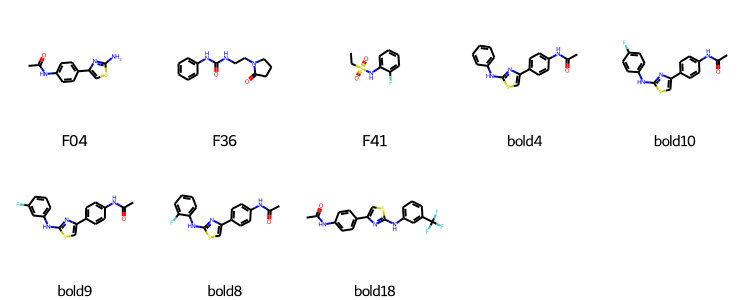

In [12]:
# There are several further followups
# but these consist of adding a substituent

from rdkit.Chem import Draw, AllChem
import operator

mols2 = list(map(Chem.Mol, mols))
*map(AllChem.Compute2DCoords, mols2),

Draw.MolsToGridImage(mols2,
                     legends=list(map(operator.methodcaller('GetProp', '_Name'), mols)),
                     subImgSize=(150,150), useSVG=True,
                     molsPerRow=5)